### Import Libraries

In [1]:
# Add libraries freely, if you need.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 사용 설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic'   # Windows에서 한글 사용
matplotlib.rcParams['font.size'] = 15                  # 한글 글자 크기 설정
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
import sys

print(sys.version)

3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]


***
# 01. Linear Regression
- Dataset: car_dataset.csv
- Source: kaggle
- Target: Price
> You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### [1] _____ 01-(a). Import Libraries and Dataset
### [2] _____ 01-(a). Data Analysis

##### (a) (5pt) car_dataset_revised.csv를 car_data 변수에 넣어 읽어오기

In [3]:
# (a) TO DO
# categorical_vars     = ['CompanyName', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype','cylindernumber']
# numerical_vars       = ['wheelbase','carlength', 'carwidth','curbweight','enginesize','boreratio', 'horsepower','fueleconomy']
# usecols              = [categorical_vars numerical_vars]
# car_dataset_revised  = pd.read_csv(car_data, usecols=categorical_vars)

car_data = 'car_dataset.csv'

car_dataset = pd.read_csv(car_data)
car_dataset

,CompanyName,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,21,27,13495.0
1,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,21,27,16500.0
2,alfa-romero,gas,std,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,19,26,16500.0
3,audi,gas,std,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,24,30,13950.0
4,audi,gas,std,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,sedan,rwd,front,109.1,188.8,68.9,2952,ohc,four,141,3.78,114,23,28,16845.0
201,volvo,gas,turbo,sedan,rwd,front,109.1,188.8,68.8,3049,ohc,four,141,3.78,160,19,25,19045.0
202,volvo,gas,std,sedan,rwd,front,109.1,188.8,68.9,3012,ohcv,six,173,3.58,134,18,23,21485.0
203,volvo,diesel,turbo,sedan,rwd,front,109.1,188.8,68.9,3217,ohc,six,145,3.01,106,26,27,22470.0


#### 데이터의 구조 파악


'01-(c). 5. Model Training'에서는 categorical values에 대해 One-Hot Encoding을 적용하게 된다. 숫자 데이터가 아닌 categorical values에 대해 Linear Regression으로 학습하기 위해서는 One-Hot Encoding이 필요하기 때문이다. 이 과정에서, DataFrame의 열의 갯수가 각 categorical values의 중복되지 않는 Unique한 값의 갯수에 맞춰서 늘어나게 된다.

예를 들어, [drivewheel]열의 경우 rwd, fwd, 4wd 이렇게 3개의 Unique한 값으로만 구성되어 있다. 이 각각의 데이터가 다음과 같이 변환하여 처리되기 때문에 이 데이터 Feature의 경우에는 3개의 열로 분리되어 나타날 것이다.

'rwd'  : [1,0,0]

'fwd'  : [0,1,0]

'4wd'  : [0,0,1]

따라서, 각 categorical values의 Unique한 값의 갯수의 총합을 미리 구해서 몇 개의 열이 추가되게 되는지 확인해보기 위해 이 과정을 추가하였다.

In [4]:
temp_1 = pd.DataFrame(car_dataset['CompanyName'].unique())
temp_1 = temp_1.shape[0]

temp_2 = pd.DataFrame(car_dataset['fueltype'].unique())
temp_2 = temp_2.shape[0]

temp_3 = pd.DataFrame(car_dataset['aspiration'].unique())
temp_3 = temp_3.shape[0]

temp_4 = pd.DataFrame(car_dataset['carbody'].unique())
temp_4 = temp_4.shape[0]

temp_5 = pd.DataFrame(car_dataset['drivewheel'].unique())
temp_5 = temp_5.shape[0]

temp_6 = pd.DataFrame(car_dataset['enginelocation'].unique())
temp_6 = temp_6.shape[0]

temp_7 = pd.DataFrame(car_dataset['enginetype'].unique())
temp_7 = temp_7.shape[0]

temp_8 = pd.DataFrame(car_dataset['cylindernumber'].unique())
temp_8 = temp_8.shape[0]

unique_cateorical_val_sum = temp_1+temp_2+temp_3+temp_4+temp_5+temp_6+temp_7+temp_8
unique_cateorical_val_sum

50

In [5]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CompanyName     205 non-null    object 
 1   fueltype        205 non-null    object 
 2   aspiration      205 non-null    object 
 3   carbody         205 non-null    object 
 4   drivewheel      205 non-null    object 
 5   enginelocation  205 non-null    object 
 6   wheelbase       205 non-null    float64
 7   carlength       205 non-null    float64
 8   carwidth        205 non-null    float64
 9   curbweight      205 non-null    int64  
 10  enginetype      205 non-null    object 
 11  cylindernumber  205 non-null    object 
 12  enginesize      205 non-null    int64  
 13  boreratio       205 non-null    float64
 14  horsepower      205 non-null    int64  
 15  citympg         205 non-null    int64  
 16  highwaympg      205 non-null    int64  
 17  price           205 non-null    flo

In [6]:
car_dataset.describe()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,2555.565854,126.907317,3.329756,104.117073,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,520.680204,41.642693,0.270844,39.544167,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,1488.000000,61.000000,2.540000,48.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,2145.000000,97.000000,3.150000,70.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,2414.000000,120.000000,3.310000,95.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,2935.000000,141.000000,3.580000,116.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,4066.000000,326.000000,3.940000,288.000000,49.000000,54.000000,45400.000000


In [7]:
car_dataset.head(10)

,CompanyName,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,21,27,13495.000
1,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,21,27,16500.000
2,alfa-romero,gas,std,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,19,26,16500.000
3,audi,gas,std,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,24,30,13950.000
4,audi,gas,std,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,18,22,17450.000
5,audi,gas,std,sedan,fwd,front,99.8,177.3,66.3,2507,ohc,five,136,3.19,110,19,25,15250.000
6,audi,gas,std,sedan,fwd,front,105.8,192.7,71.4,2844,ohc,five,136,3.19,110,19,25,17710.000
7,audi,gas,std,wagon,fwd,front,105.8,192.7,71.4,2954,ohc,five,136,3.19,110,19,25,18920.000
8,audi,gas,turbo,sedan,fwd,front,105.8,192.7,71.4,3086,ohc,five,131,3.13,140,17,20,23875.000
9,audi,gas,turbo,hatchback,4wd,front,99.5,178.2,67.9,3053,ohc,five,131,3.13,160,16,22,17859.167


##### Deriving new features - "fueleconomy"  & "carsrange"

Fuel Economy Feature을 통해서는, 연비에 따른 차량 가격의 상관관계를 파악할 수 있다.

Fuel Economy가 좋은 차량일 수록 전반적으로 차량 가격이 저렴하고, Fuel Economy가 안 좋은 차량일 수록 전반적으로 차량 가격이 비싼 것을 토대로 생각해보면, Fuel Ecocomy와 차량의 가격은 반비례관계에 있다고 생각할 수 있다.

또한, drivewheel의 종류와 Fuel Economy의 관계에 대해 생각해보면, 후륜 구동(rwd)차량과 4륜 구동(4wd)차량은 대부분 Fuel Economy가 좋지 않음을 확인할 수 있다. 전륜 구동(fwd)차량은 전반적으로 차량 가격이 저렴한 것을 확인할 수 있다.

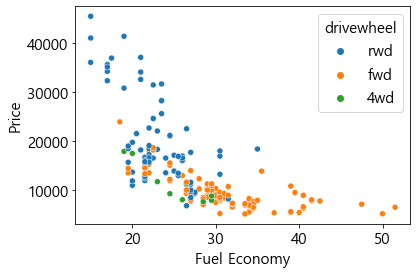

In [8]:
# Add New Column!   -> Size Changes to (205X19)
car_dataset['fueleconomy'] = (0.5*car_dataset['citympg']) + (0.5*car_dataset['highwaympg'])

plt.figure(figsize=(6,4))
sns.scatterplot(car_dataset['fueleconomy'],car_dataset['price'],hue=car_dataset['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')
plt.show()

# 'fueleconomy' has an obvious negative correlation with price and is significant.

##### 해당 데이터에서의 numerical variable 과 가격 간의 각각의 상관관계를 시각화하고 경향성을 파악하기

각 값의 의미를 설명하자면 다음과 같다.

양수값 : 양의 상관관계(정비례)에 있다는 의미.

음수값 : 음의 상관관계(반비례)에 있다는 의미.

1.0000 : 동일 데이터 끼리 비교하였다는 의미.

예를 들어, 2행 1열의 값을 살펴보면 0.874587이 나왔다.

이 값의 의미는, wheelbase와 carlength는 서로 양의 상관관계가 있으며, 그 상관관계가 다소 강하다고 판단할 수 있다.

In [9]:
car_dataset_corr = car_dataset.corr()
car_dataset_corr

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,fueleconomy
wheelbase,1.000000,0.874587,0.795144,0.776386,0.569329,0.488750,0.353294,-0.470414,-0.544082,0.577816,-0.511871
carlength,0.874587,1.000000,0.841118,0.877728,0.683360,0.606454,0.552623,-0.670909,-0.704662,0.682920,-0.693200
carwidth,0.795144,0.841118,1.000000,0.867032,0.735433,0.559150,0.640732,-0.642704,-0.677218,0.759325,-0.665184
curbweight,0.776386,0.877728,0.867032,1.000000,0.850594,0.648480,0.750739,-0.757414,-0.797465,0.835305,-0.783584
enginesize,0.569329,0.683360,0.735433,0.850594,1.000000,0.583774,0.809769,-0.653658,-0.677470,0.874145,-0.670689
boreratio,0.488750,0.606454,0.559150,0.648480,0.583774,1.000000,0.573677,-0.584532,-0.587012,0.553173,-0.590044
horsepower,0.353294,0.552623,0.640732,0.750739,0.809769,0.573677,1.000000,-0.801456,-0.770544,0.808139,-0.791291
citympg,-0.470414,-0.670909,-0.642704,-0.757414,-0.653658,-0.584532,-0.801456,1.000000,0.971337,-0.685751,0.992434
highwaympg,-0.544082,-0.704662,-0.677218,-0.797465,-0.677470,-0.587012,-0.770544,0.971337,1.000000,-0.697599,0.993174
price,0.577816,0.682920,0.759325,0.835305,0.874145,0.553173,0.808139,-0.685751,-0.697599,1.000000,-0.696835


In [10]:
car_dataset_corr_price = pd.DataFrame(car_dataset_corr['price'])
car_dataset_corr_price = car_dataset_corr_price.drop(index=['price','citympg','highwaympg'])
car_dataset_corr_price

,price
wheelbase,0.577816
carlength,0.682920
carwidth,0.759325
curbweight,0.835305
enginesize,0.874145
boreratio,0.553173
horsepower,0.808139
fueleconomy,-0.696835


하단의 그래프를 통해,

wheelbase, carlength, carwidth, curbweight, enginesize, boreratio, horsepower, fueleconomy 각각이 Price와 가지는 상관관계를 파악할 수 있다.

wheelbase, carlength, carwidth, curbweight, enginesize, boreratio, horsepower 은 Price와 양의 상관관계(정비례관계)임을,

fueleconomy 는 Price와 음의 상관관계(반비례관계)임을 파악할 수 있다.

이 중에서도 enginesize가 Price와 가장 큰 상관관계를 보였다.

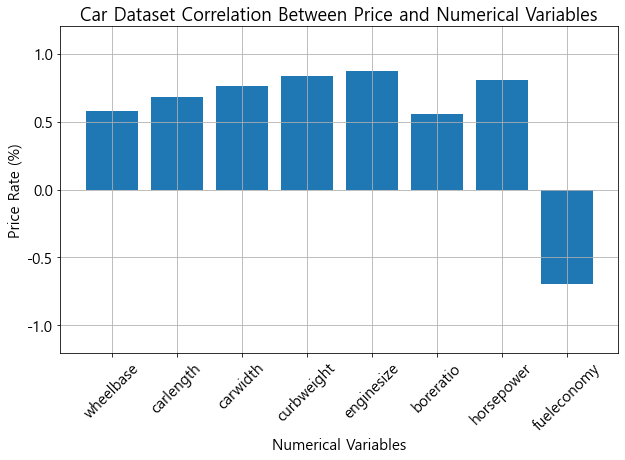

In [11]:
# (a) TO DO
plt.figure(figsize=(10,6))
plt.title('Car Dataset Correlation Between Price and Numerical Variables')
plt.bar(car_dataset_corr_price.index,car_dataset_corr_price['price'],)

plt.xlabel('Numerical Variables')
plt.ylabel('Price Rate (%)')
plt.ylim([-1.2,1.2])
plt.xticks(rotation=45)   
plt.grid()
plt.show()

### [3] _____ 01-(b). Data Pre-Processing

##### (b) (5pt) one-hot encoding이 필요한 변수를 처리하여 final_data 변수에 저장하고, 이 과정이 왜 필요한지 (주석 달고) 설명하기

cateorical value인 'CompanyName', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber' 의 경우, 값이 연속형 변수가 아닌 범주형 변수다. 쉽게 이야기하자면, '숫자'에 해당하는 값이 아니기 때문에 'one-hot encoding'을 적용하지 않고 분석 모델에 적용한다면 에러가 발생한다. 이러한 에러를 해결하기 위해 범주형 변수를 수치로 변경해야 한다.


이때 one-hot encoding을 적용하는데, one-hot encoding이란, 범주형 변수가 가지는 값 만큼 변수를 만들고 자기 위치만 1, 나머지는 0을 만들어서 변환하는 것이다. 예를 들어, [drivewheel]열의 경우 rwd, fwd, 4wd 이렇게 3개의 값으로만 구성되어 있는데, 이 각각의 데이터를 다음과 같이 변환하여 처리할 수 있다.

    'rwd'  : [1,0,0]

    'fwd'  : [0,1,0]

    '4wd'  : [0,0,1]

이러한 논리를 이번 Dataframe의 모든 categorical value에 모두 적용하면 다음과 같다. 

참고로, Python을 통해서 One-Hot Encoding은 크게 두 가지 방법을 통해 구현할 수 있다.

Pandas 내장 함수를 이용한 방법과 sklearn의 내장 함수를 이용한 방법이 있는데, 여기서는 Pandas를 이용하여 진행하겠다.

#### For more information about One-Hot Encoding, Click [Here](https://intrepidgeeks.com/tutorial/onehot-encoding) !

In [12]:
# (b) TO DO
# One-Hot Encoding Method (1) - Using Pandas
One_Hot_Encoded_data = pd.get_dummies(car_dataset)
One_Hot_Encoded_data

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0,...,0,0,0,0,0,1,0,0,0,0
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0,...,0,0,0,0,0,1,0,0,0,0
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0,...,0,1,0,0,0,0,1,0,0,0
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,...,0,0,0,0,0,1,0,0,0,0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,141,3.78,114,23,28,16845.0,...,0,0,0,0,0,1,0,0,0,0
201,109.1,188.8,68.8,3049,141,3.78,160,19,25,19045.0,...,0,0,0,0,0,1,0,0,0,0
202,109.1,188.8,68.9,3012,173,3.58,134,18,23,21485.0,...,0,1,0,0,0,0,1,0,0,0
203,109.1,188.8,68.9,3217,145,3.01,106,26,27,22470.0,...,0,0,0,0,0,0,1,0,0,0


In [13]:
# One-Hot Encoding Method (2) - Using sklearn
from sklearn.preprocessing import OneHotEncoder

onehot                        = OneHotEncoder(handle_unknown='ignore')
One_Hot_Encoded_data_2        = car_dataset['CompanyName'].to_numpy().reshape(-1,1)
onehot.fit(One_Hot_Encoded_data_2)
onehot.transform(One_Hot_Encoded_data_2).toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

### [4] _____ 01-(c). Train-Test Split
##### (c) (10pt) scikit learn의 LinearRegression module을 사용하여 훈련 데이터를 통해 학습하고, 테스트 데이터를 통해 예측하여라.

Train Data Set과 Test Data Set을 7:3의 비율로 data slicing하여 Train Data를 기반으로 학습하고, Test Data로 검증을 진행하겠다.

In [14]:
from sklearn.model_selection import train_test_split

X = One_Hot_Encoded_data.drop(['price'], axis=1)
y = One_Hot_Encoded_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(143, 60) (62, 60) (143,) (62,)


### [5] _____ 01-(c). Model Training

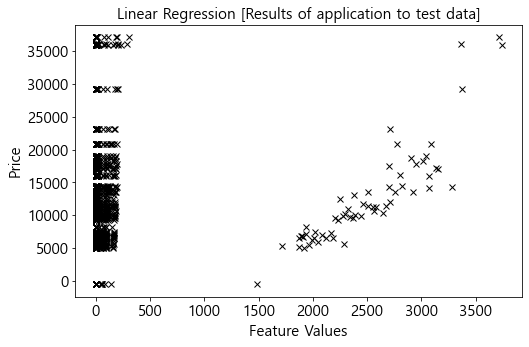

In [15]:
# (c) TO DO
from sklearn.linear_model import LinearRegression


# 1. 모델 선정하기
lin_reg = LinearRegression();

# 2. 모델 학습시키기 [Using Train Data] 
lin_reg.fit(X_train, y_train);

# 3. 모델 적용하기 [Using Test Data]
y_predicted = lin_reg.predict(X_test)

plt.figure(figsize=(8,5));
plt.plot(X_test, y_predicted, 'xk')
plt.title('Linear Regression [Results of application to test data]', fontsize = 15)
plt.xlabel('Feature Values');   plt.ylabel('Price');   plt.show()

위의 Plot 결과는, One_Hot_Encoded_data에서 30%만 떼어낸 X_test Data Set이 가지고 있는 모든 Feature에 대한 Plotting이다.

wheelbase Data를 바탕으로 예측한 Price에 대한 Plot,

carlength Data를 바탕으로 예측한 Price에 대한 Plot,

carwidth Data를 바탕으로 예측한 Price에 대한 Plot,

curbweight Data를 바탕으로 예측한 Price에 대한 Plot,

enginesize Data를 바탕으로 예측한 Price에 대한 Plot,

이 모든 Plot이 위의 한 figure에 그려진 것이기에 다소 지저분한 그래프가 찍히게 된다.

따라서, Linear Regression이 성공적으로 되었는지 확인하기 위해 예시로 몇몇 Feature에 대해 따로 Plot을 해보겠다.

즉, 특정 Feature를 바탕으로 예측한 Price값에 대한 그래프를 Plot하여서 앞에서 관찰한대로 양의 상관관계, 음의 상관관계를 보이는지 확인하도록 하겠다.

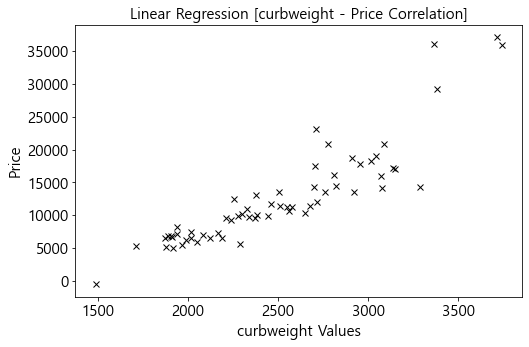

In [16]:
plt.figure(figsize=(8,5))
plt.plot(X_test['curbweight'], y_predicted, 'xk')
plt.title('Linear Regression [curbweight - Price Correlation]', fontsize = 15)
plt.xlabel('curbweight Values');   plt.ylabel('Price');   plt.show()

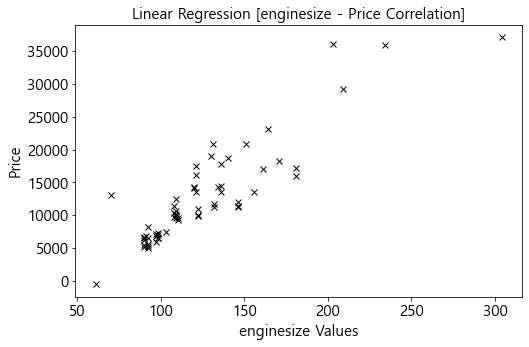

In [17]:
plt.figure(figsize=(8,5))
plt.plot(X_test['enginesize'], y_predicted, 'xk')
plt.title('Linear Regression [enginesize - Price Correlation]', fontsize = 15)
plt.xlabel('enginesize Values');   plt.ylabel('Price');   plt.show()

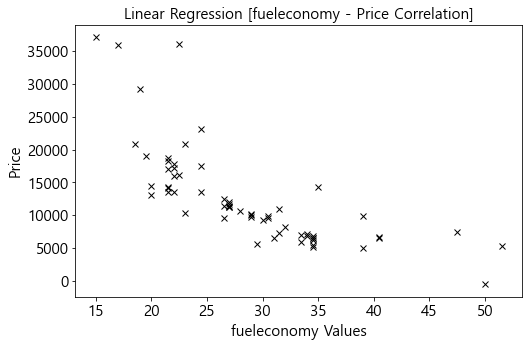

In [18]:
plt.figure(figsize=(8,5))
plt.plot(X_test['fueleconomy'], y_predicted, 'xk')
plt.title('Linear Regression [fueleconomy - Price Correlation]', fontsize = 15)
plt.xlabel('fueleconomy Values');   plt.ylabel('Price');   plt.show()

가장 큰 양의 상관관계를 보였던 curbweight, enginesize에 대해서는 기대했던 것과 같이 학습 결과가 양의 선형 관계로 나타났다.

반대로, 음의 상관관계를 보였던 fueleconomy에 대해서는 기대했던 것과 같이 학습 결과가 음의 선형 관계로 나타남을 확인할 수 있다.

##### MSE와 R-square 값을 계산하여라

MSE      = 측정값 또는 예측값과 참이라고 생각되는 값과의 차이, 오차에 대한 제곱의 평균

R-Square = 회귀 직선의 방정식이 얼마나 원래의 자료를 잘 설명하는지 나타내는 수치

In [19]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, lin_reg.predict(X_test))
mse

6761916.76242541

In [20]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, lin_reg.predict(X_test))
r2

0.8976046939439501

***

# 02. Logistic Regression

- Dataset: fordA_train.csv, fordA_test.csv
- Source: http://www.timeseriesclassification.com/description.php?Dataset=FordA
- Target: Label (normal:1, abnormal:-1)
> This data was originally used in a competition in the IEEE World Congress on Computational Intelligence, 2008. The classification problem is to diagnose whether a certain symptom exists or does not exist in an automotive subsystem. Each case consists of 500 measurements of engine noise and a classification. There are two separate problems: For FordA the Train and test data set were collected in typical operating conditions, with minimal noise contamination.
- Notice: Do not download the file directly from the above-mentioned site. The provided file is a modified version of the original data.

### [1] _____ 02-(a). Import Libraries and Dataset

In [21]:
# load dataset
ford_train  = pd.read_csv('fordA_train.csv')  # train_df
ford_test   = pd.read_csv('fordA_test.csv')   # test_df

print(ford_train.shape, ford_test.shape)

(3601, 501) (1320, 501)


In [22]:
ford_train.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,-0.797172,-0.664392,-0.373015,0.040815,0.526936,0.984288,1.353120,1.578108,1.659251,1.640809,...,0.722417,0.362068,0.092083,-0.081268,-0.212573,-0.391456,-0.664392,-1.073796,-1.564343,-1
1,0.804855,0.634629,0.373474,0.038343,-0.340988,-0.740860,-1.109667,-1.395357,-1.570192,-1.619951,...,0.049213,-0.258138,-0.510583,-0.683647,-0.773817,-0.785255,-0.714885,-0.560443,-0.319086,1
2,0.727985,0.111284,-0.499124,-1.068629,-1.578351,-1.990534,-2.302031,-2.503403,-2.585211,-2.550600,...,0.463685,0.507735,0.517174,0.504588,0.476270,0.438513,0.394463,0.339400,0.255391,-1
3,-0.234439,-0.502157,-0.732488,-0.946128,-1.139739,-1.323336,-1.490243,-1.607077,-1.620430,-1.506933,...,-0.929437,-0.922761,-0.929437,-0.909409,-0.835970,-0.695768,-0.478790,-0.188707,0.119736,-1
4,-0.171328,-0.062285,0.235829,0.710396,1.239969,1.649823,1.876321,1.865535,1.703751,1.466467,...,0.725496,0.697453,0.731967,0.808545,0.839823,0.733046,0.437520,-0.026585,-0.602213,-1


In [23]:
ford_test.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,-0.140402,0.171641,0.302044,0.232804,0.033853,-0.224183,-0.469987,-0.645396,-0.617700,-0.367280,...,0.390903,0.974831,1.258717,1.143316,0.647092,-0.049582,-0.690402,-0.976596,-0.794263,-1
1,0.334038,0.322253,0.453844,0.671852,0.887897,1.020469,1.059750,1.030290,0.950746,0.858436,...,-0.346502,-0.924912,-1.208716,-1.247996,-1.139974,-1.041772,-1.041772,-1.159614,-1.375659,-1
2,0.716686,0.744367,0.725913,0.661325,0.555217,0.413585,0.246580,0.065273,-0.121109,-0.301032,...,2.276019,1.219548,0.081881,-1.050250,-2.092881,-2.983269,-3.675281,-4.136622,-4.339612,-1
3,1.240282,1.331189,1.386596,1.383220,1.305979,1.142784,0.878613,0.532291,0.140025,-0.258262,...,-1.124551,-1.302012,-1.340564,-1.271440,-1.146352,-1.011328,-0.931222,-0.934498,-1.001288,1
4,-1.159478,-1.204174,-1.167605,-1.033518,-0.818166,-0.558119,-0.299291,-0.093691,0.022770,0.044337,...,0.441438,0.206176,-0.006941,-0.146919,-0.183082,-0.112382,0.008987,0.131413,0.186266,-1


##### (a-1) (5 pt) train과 test 데이터 셋으로부터 설명 변수와 종속 변수를 구분하여 저장 (X_train, y_train, X_test, y_test)

제공된 데이터는 시계열 데이터 유형에 속하며 자동차 시스템의 500개 센서에서 시간 경과에 따라 측정된 값을 포함하고 있다.

따라서, Train Data Set에서 하나의 열은

하나의 센서가 [1~3601]시간 구간 동안 측정한 시계열 Data Set 를 의미한다.

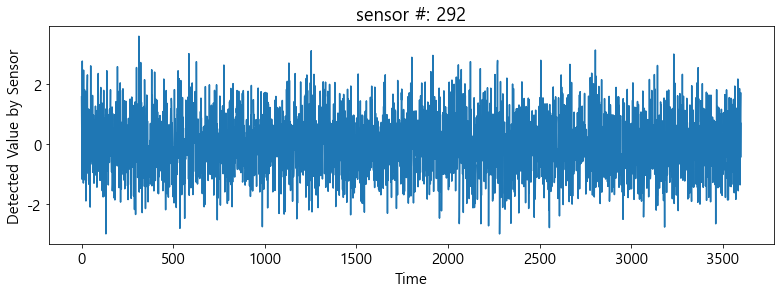

In [24]:
import random
random_number = random.randint(0,500)         # 0~500 사이의 임의의 정수값 생성

plt.figure(figsize=(13,4))
plt.plot(ford_train.iloc[:,random_number])    # 임의의 열 Data만을 가져온다
plt.title('sensor #: {}'.format(random_number))
plt.xlabel('Time'); plt.ylabel('Detected Value by Sensor'); plt.show();

In [25]:
# (a-1) TO DO
train_column = ford_train.columns
train_column

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '491', '492', '493', '494', '495', '496', '497', '498', '499', '500'],
      dtype='object', length=501)

In [26]:
test_column = ford_test.columns
test_column

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '491', '492', '493', '494', '495', '496', '497', '498', '499', '500'],
      dtype='object', length=501)

train Data Set의 Column갯수와 test Data Set의 Column갯수가 각각 501개라는 것과 Column이름의 인덱스가 0부터 시작하는 것을 확인하였으므로, 

X_train과 y_train을 나눌 때, 마지막 501번째 열인 '500'에 해당하는 값들이 y Data로 들어갈 수 있도록 코드를 작성해주면 된다.

In [27]:
X_train = ford_train[:][train_column[0:500]]  # ford_train에서 맨 마지막 열만 제외
y_train = ford_train[:][train_column[500]]    # ford_train에서 에서의 맨 마지막 열

X_test = ford_test[:][test_column[0:500]]     # ford_test에서 맨 마지막 열만 제외
y_test = ford_test[:][test_column[500]]       # ford_test에서 에서의 맨 마지막 열

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3601, 500) (3601,) (1320, 500) (1320,)


##### (a-2) (5 pt) 훈련과 테스트 데이터 내에 정상/비정상 집단의 비율을 시각화 하여 확인

In [28]:
train_data_classified = ford_train.groupby(['500']).count()
train_data_classified = train_data_classified.iloc[ [0, 1], [0] ]

train_data_classified.index.name = 'Abnornmal | Normal'
train_data_classified.columns = ['Train Data Count']
train_data_classified

,Train Data Count
Abnornmal | Normal,
-1,1846
1,1755


In [29]:
test_data_classified = ford_test.groupby(['500']).count()
test_data_classified = test_data_classified.iloc[ [0, 1], [0] ]

test_data_classified.index.name = 'Abnornmal | Normal'
test_data_classified.columns = ['Test Data Count']
test_data_classified

,Test Data Count
Abnornmal | Normal,
-1,681
1,639


##### 1   = (정상)
##### -1  = (비정상) 


따라서,

정상/비정상 데이터의 갯수가 Train Data Set에서 서로 비슷하며,

정상/비정상 데이터의 갯수가 Test Data Set에서도 서로 비슷한 갯수로 존재한다고 생각할 수 있다.

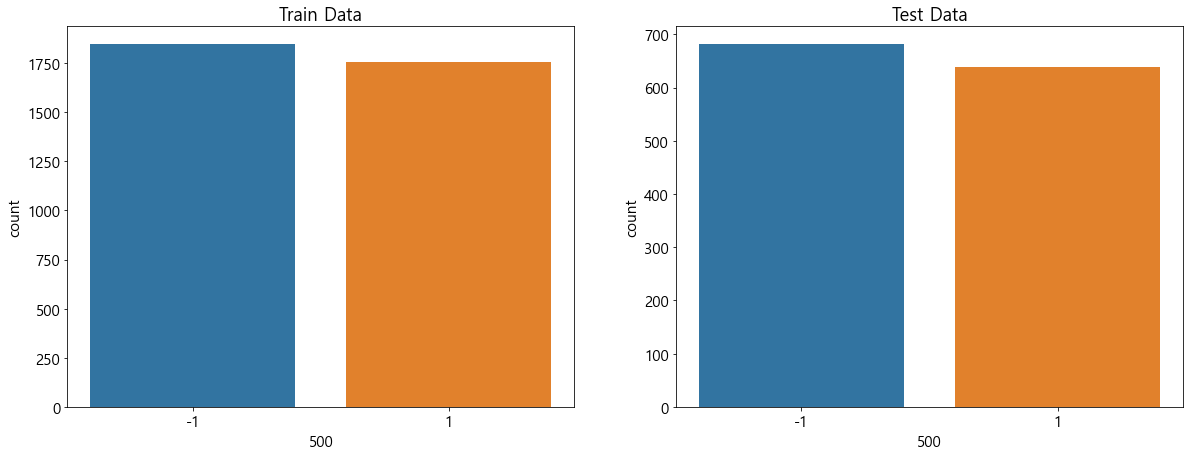

In [30]:
# (a-2) TO DO
fig, axs = plt.subplots(1, 2, figsize=(20, 7))
width    = 1.6

# 첫번째 그래프 넣기
axs[0].bar(train_data_classified.index[0], train_data_classified.values[0], width = width, color=[50/255, 116/255, 161/255])
axs[0].bar(train_data_classified.index[1], train_data_classified.values[1], width = width, color=[225/255, 129/255, 44/255])
axs[0].set_title('Train Data')
axs[0].set(xlabel='500', ylabel='count')
axs[0].set_xticks([-1, 1])

# 두 번째 그래프 넣기
axs[1].bar(test_data_classified.index[0], test_data_classified.values[0], width = width, color=[50/255, 116/255, 161/255])
axs[1].bar(test_data_classified.index[1], test_data_classified.values[1], width = width, color=[225/255, 129/255, 44/255])
axs[1].set_title('Test Data')
axs[1].set(xlabel='500', ylabel='count')
axs[1].set_xticks([-1, 1])

plt.show()

### [2] _____ 02-(a). Data Analysis

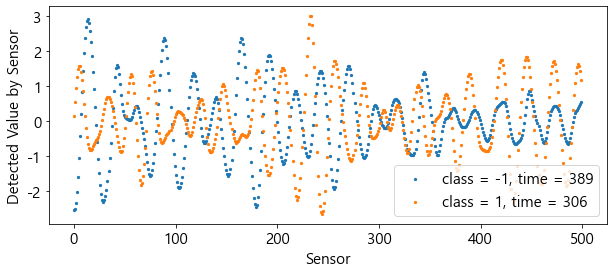

In [31]:
labels = np.array([-1,1])

plt.figure(figsize=(10,4))

for c in labels:
    df = X_train[y_train == c].reset_index(drop=True)  # 기존에 사용하던 Index는 삭제하고, 0부터 시작하는 새로운 인덱스 지정
    time_t = random.randint(0, df.shape[0])             # 임의의 행 가져옴 [특정 시간에서 500개의 센서가 읽은 값이 time_t에 저장]
    plt.scatter(range(0,500), df.iloc[time_t], label='class = ' + str(int(c)) + ', time = ' + str(time_t), s = 5)

plt.legend(loc='lower right')                           # 범례의 출력 위치 지정
plt.xlabel('Sensor')
plt.ylabel('Detected Value by Sensor')
plt.show()

### [3] _____ 02-(a). Data Preprocessing

500개의 센서에서 읽어오는 값의 크기와 범위가 각각 다르기 때문에,

Machine Learning을 위한 데이터셋을 정제할 때 특성별로 데이터의 스케일을 맞춰주는 작업이 필요하다. 

따라서, Data Pre-Processing에서는 Data Scaling과정을 우선적으로 진행한 뒤에 Machine Learning Model을 적용하는 것이 바람직하다.

##### Data Scaling Method

Standardization (표준화)

    └ 특성들의 평균을 0, 분산을 1 로 스케일링하는 것으로, 특성들을 정규분포로 만드는 것.

Normalization (정규화)

    └특성들을 특정 범위(주로 [0~1]) 로 스케일링 하는 것.
      가장 작은 값은 0, 가장 큰 값은 1 로 변환되므로, 모든 특성들은 [0, 1] 범위를 갖게된다.

[1] StandardScalar : 각 특성의 평균을 0, 분산을 1로 변경하여 모든 특성이 같은 크기를 가지게 하는 것이다.
      
[2] MinMaxSclaer : 특성들을 특정 범위(주로 [0~1]) 로 스케일링 하는 것이다.

[3] MaxAbsScaler : 각 특성의 절대값이 0 과 1 사이가 되도록 하므로, 모든 값은 -1 과 1 사이로 표현되며, 데이터가 양수일 경우 MinMaxScaler 와 동일하다.

[4] RobustScaler : 스케일링 할 때, 평균과 분산 대신에 중간 값과 사분위 값을 사용한다.
   
       └  중간 값은 정렬시 중간에 있는 값을 의미
           사분위값은 1/4, 3/4에 위치한 값을 의미

##### Scaling 기법 [1]~[3]은 이상치에 매우 민감한 기법
##### Scaling 기법 [4]는 이상치 영향을 최소화할 수 있는 기법.

앞에서 살펴본 각 센서의 시간에 따른 값의 변화를 살펴보면 이상치가 존재한다는 것을 쉽게 확인할 수 있다.

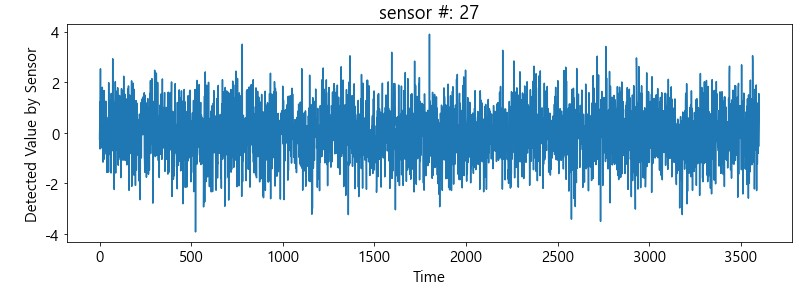

따라서, 이상치 영향을 최소화 할 수 있는 기법인 RobustScaler를 사용하여 Data Pre-Processing을 진행하도록 한다.

#### For more information about scaling, Click [Here](https://wooono.tistory.com/96) !

In [32]:
# Outliers can often occur in process data, which requires robust normalization.
from sklearn.preprocessing import RobustScaler

rbscale = RobustScaler()
X_train = rbscale.fit_transform(X_train)
X_test  = rbscale.transform(X_test)

### [4] _____ 02-(b). Model Training

##### (b) (5 pt) 모델을 학습 시키고 테스트 데이터로 예측

LIBLINEAR
  
      └ Logistic Regression에서 Default Solver는 Liblinear인데, 새로운 버전부터 Default Solver가 바뀌었다.
         따라서, 특별한 경우가 아니라면 'solver='liblinear' 을 입력해주고 사용하도록 한다.
         참고로, liblinear은 작은 데이터에서 적합한 알고리즘이라고 한다.

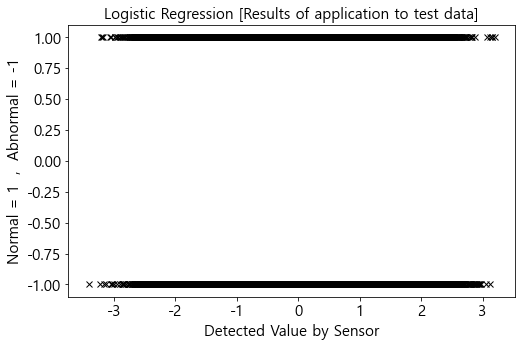

In [33]:
# (b) TO DO
from sklearn.linear_model import LogisticRegression


# 1. 모델 선정하기
base_model = LogisticRegression(solver='liblinear', random_state=0)

# 2. 모델 학습시키기 [Using Train Data]
base_model.fit(X_train, y_train)

# 3. 모델 적용하기 [Using Test Data]
y_predicted = base_model.predict(X_test)

plt.figure(figsize=(8,5));
plt.plot(X_test, y_predicted, 'xk')
plt.title('Logistic Regression [Results of application to test data]', fontsize = 15)
plt.xlabel('Detected Value by Sensor');   plt.ylabel('Normal = 1  ,  Abnormal = -1');   plt.show()

Logistic Regression 결과 위와 같이 Plot되었는데, x축의 '0'을 기준으로 정상 데이터('1')와 비정상 데이터('-1')를 제대로 구분하지 못하고 있음을 볼 수 있다. 

따라서, 위의 결과는 이상적인 Logistic Regression Plot결과가 아니라고 할 수 있다.

참고로, 이상적인Logistic Regression 결과는 다음과 같이 x축의 중간 지점을 기준으로 하여 Binary Classification이 되는 것을 확인할 수 있어야 한다.

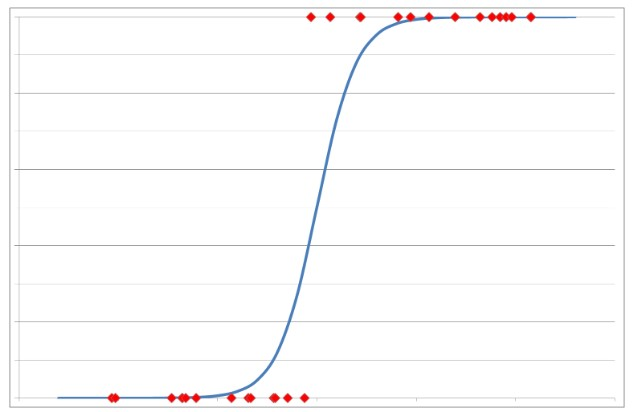

### [5] _____ 02-(c). Model Evaluation

##### (c) (10 pt) 모델의 성능을 평가하기 위해 ‘conf_matrix’ 그리고 ‘model_evaluation’ 함수를 정의. 
        
##### 1)
            'model_evaluation' 함수 내의 TP, TN, FP, FN 값을 각각 정의하고 이 값들을 적절히 사용하여
            accuracy, precision, recall, f1_score를 출력하는 함수를 정의하여라.
        
##### 2)
            위에서 정의한 두가지 함수를 이용해 (모델의) 성능을 평가하여라.
       
##### 3)
            scikitplot 모듈을 사용해 ROC curve를 그려라.

한편, scikit-learn이 제공하는 함수들을 통해,

위에서 정의한 ‘model_evaluation’ 함수를 통해 구현한 네 가지 값을 쉽게 얻을 수 있는데, 이 값이 일치하는지 살펴보고, 다르다면 이유를 생각하기.

#### For more information about Scikit-learn confusion matrix, Click [Here](https://stackoverflow.com/questions/35178590/scikit-learn-confusion-matrix)!

In [34]:
from sklearn.metrics import confusion_matrix

def conf_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)     # y_test = real data          y_pred = predicted data [using Test data]
    cm = pd.DataFrame(data=cm,
                      index=['Actual -1', 'Actual +1'],
                      columns=['Predict -1', 'Predict +1'])

    
    # plotting the confusion matrix
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

In [35]:
# (c-1) TO DO
def model_evaluation(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
           
    TP = cm[0,0]
    TN = cm[1,1]
    FP = cm[1,0]
    FN = cm[0,1]
    
    accuracy   =  (TP+TN)/(TP+TN+FP+FN)
    precision  =  (TP)/(TP+FP)
    recall     =  (TP)/(TP+FN)
    f1_score   =  2 * pow( (1/precision + 1/recall), -1 )
    
    print('TP         = ', TP)
    print('TN         = ', TN)
    print('FP         = ', FP)
    print('FN         = ', FN)

    print('accuracy   = ', accuracy)
    print('precision  = ', precision)
    print('recall     = ', recall)
    print('f1_score   = ', f1_score)

TP         =  364
TN         =  288
FP         =  351
FN         =  317
accuracy   =  0.49393939393939396
precision  =  0.509090909090909
recall     =  0.5345080763582967
f1_score   =  0.5214899713467049


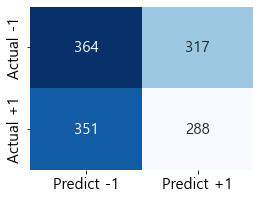

In [36]:
# (c-2) TO DO
model_evaluation(y_test, y_predicted)
conf_matrix(y_test, y_predicted)

우선, 각각의 용어 정리부터 하자면 다음과 같다.

TP = 실제 양성(불량, 비정상), 예측도 양성(불량, 비정상)으로 한 Data

TN = 실제 음성(정상), 예측도 음성(정상)으로 한 Data

FP = 실제로는 음성(정상), 예측은 반대로 양성(불량, 비정상)으로 한 Data

FN = 실제로는 양성(불량, 비정상), 예측은 반대로 음성(정상)으로 한 Data

***

#### [추가 설명]

여기서 사용한 DataSet의 경우 다음과 같이 Labelling 되어있다.

    양성(불량, 비정상) Data   =  -1
    음성(정상) Data           =  1


즉, Confusion Matrix의 각 인덱스는 다음과 같이 정의할 수 있다.

    Actual -1   &   Predict -1   지점이  실제로도 양성, 예측도 양성으로 한 TP
    Actual +1   &   Predict +1   지점이  실제로도 음성, 예측도 음성으로 한 TN
    Actual -1   &   Predict +1   지점이  실제로는 양성, 예측은 음성으로 한 FN 
    Actual +1   &   Predict -1   지점이  실제로는 음성, 예측은 양성으로 한 FP

따라서, [model_evaluation] 함수를 만드는 과정에서 TP, TN, FP, FN의 위치를 다음과 같이 정의해야 한다.

참고로, 이번 과제의 4번 문제로 동일한 [fordA_train], [fordA_test] Data에 대한 분석이므로 여기서 정의해준 [model_evaluation] 함수를 사용하면 된다.

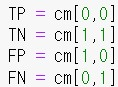

***

    Accurary   = 전체 데이터 중에 맞게 예측한 비율 (실제 True인데 예측도 Ture로 한 경우, 실제 False인데 예측도 False로 한 경우)

    Precision  = 양성으로 예측한 Case 중에서 실제로 양성인 Case의 비율

    Recall     = 실제로 양성인 Case 중에서 양성으로 예측한 Case의 비율

    f1_score   = Precision과 Recall의 조화평균

모델의 성능을 평가해보면 다음과 같다.

Logistic Regression Plotting에서 부터 이상적인 학습 결과가 나오지 않았을 때부터 예상했듯이, 정확도가 49.39%로 매우 낮게 나왔다.

이는, 실제 데이터와는 반대로 예측하는 경우가 절반 이상임을 암시한다.

따라서, Logistic Regression 학습 모델은 좋은 모델이라고 평가하기 어렵다.

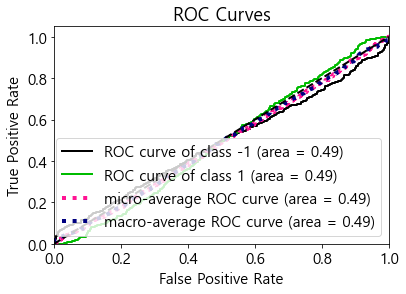

In [37]:
# !pip install scikit-plot
import scikitplot as skplt


# (c-3) TO DO

# Method(1) - Using scikit plot module
y_proba = base_model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_proba)
plt.show()

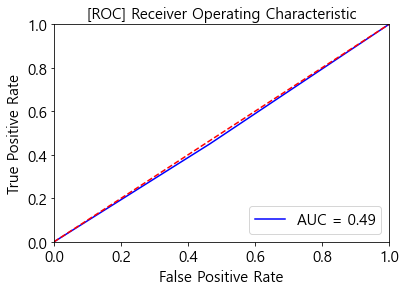

In [38]:
# Method(2) - Using Metrics
import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(y_test, y_predicted)
roc_auc = metrics.auc(fpr, tpr)

plt.title('[ROC] Receiver Operating Characteristic', fontsize = 15)
plt.plot(fpr, tpr, 'b-', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1]);   plt.ylim([0, 1]);   plt.legend(loc = 'lower right');
plt.ylabel('True Positive Rate');   plt.xlabel('False Positive Rate');   plt.show();

AUC[Area Under Curve]값이 0.49로, 앞에서 구한 Model의 Accuray와 거의 유사하게 나왔다.

따라서, ROC가 올바르게 Plot되었다고 볼 수 있다고 판단된다.

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('accuracy   = ',accuracy_score(y_test, y_predicted))
print('precision  = ',precision_score(y_test, y_predicted))
print('recall     = ',recall_score(y_test, y_predicted))
print('f1_score   = ',f1_score(y_test, y_predicted))

accuracy   =  0.49393939393939396
precision  =  0.47603305785123967
recall     =  0.4507042253521127
f1_score   =  0.4630225080385852


***

# 03. Support Vector Machine
- Dataset: breast_cancer_dataset.csv
- Source: UCI Machine Learning repository
- Target: Diagnosis (M=malignant, B=benign)
> Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
- For more information, check this website: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

### [1] _____ 03-(a). Import Libraries and Dataset

In [40]:
breast_cancer_data = pd.read_csv('breast_cancer_dataset.csv')
breast_cancer_data.head(30)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890,NaN
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440,NaN
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510,NaN
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750,NaN


In [41]:
breast_cancer_data.shape

(569, 33)

In [42]:
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [43]:
breast_cancer_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


### [2] _____ 03-(a). Data Preprocessing

pd.get_dummies 함수를 통해 One-Hot Encoding을 진행하는 코드이다.

 [drop_first=True] 를 통해 첫 열을 삭제하는 이유는, 데이터를 하나의 열로만 구성된 데이터로 바꾸어서 곧바로 data['diagnosis'] 에 넣기 위함이다.

In [44]:
breast_cancer_data['diagnosis'] = pd.get_dummies(breast_cancer_data['diagnosis'], drop_first=True)
breast_cancer_data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

***

#### [추가 설명]

여기서 사용한 DataSet의 경우 다음과 같이 Labelling 되어있다.

    M = malignant = 양성[암 진단]
    B = benign    = 음성


그리고, One-Hot Encoding을 통해서 Label이 다음과 같이 binary Data로 전환되었다.

    M = 1 = 양성
    B = 0 = 음성

즉, breast_cancer_dataset에 대해서는 Confusion Matrix의 각 인덱스가 다음과 같이 정의될 수 있다.

    Actual +1   &   Predict +1   지점이  실제로도 양성, 예측도 양성으로 한 TP
    Actual -1   &   Predict -1   지점이  실제로도 음성, 예측도 음성으로 한 TN
    Actual +1   &   Predict -1   지점이  실제로는 양성, 예측은 음성으로 한 FN 
    Actual -1   &   Predict +1   지점이  실제로는 음성, 예측은 양성으로 한 FP

    따라서, 이 경우에는 만약 TP  TN  FP  FN을 정의해본다면 다음과 같이 인덱스를 정해야 한다.
    
            TP = cm[1,1]
            TN = cm[0,0]
            FP = cm[0,1]
            FP = cm[1,0]

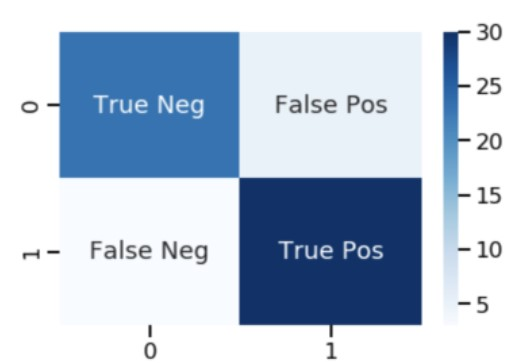

***

In [45]:
X = breast_cancer_data.drop(['id','Unnamed: 32','diagnosis'], axis=1) # axis = 1 은 '행'을 의미한다.
y = breast_cancer_data['diagnosis']

axis = 1 :: '행' 에 대한 작업을 의미

axis = 0 :: '열' 에 대한 작업을 의미

#### 그런데, 여기서 하나의 '열'을 삭제하는 drop() 메서드에서 axis=1을 사용한 이유?

    열을 제거하기 위해서는 원하는 열을 한번에 지우는 것이 아니라 원하는 열 안에 포함되어 있는 각 원소들을
    하나씩 제거해 열을 지우는 것이다.
    
    그렇기 때문에 행으로 접근할 필요가 있고 그래서 axis는 0이 아니라 1인 것이다. 

따라서,
이번 코드에서는, Data Set의 열을 Drop하는 것이 목적이기 때문에 'axis=1' 을 추가하도록 한다.

##### check correlation between the variables

<AxesSubplot:>

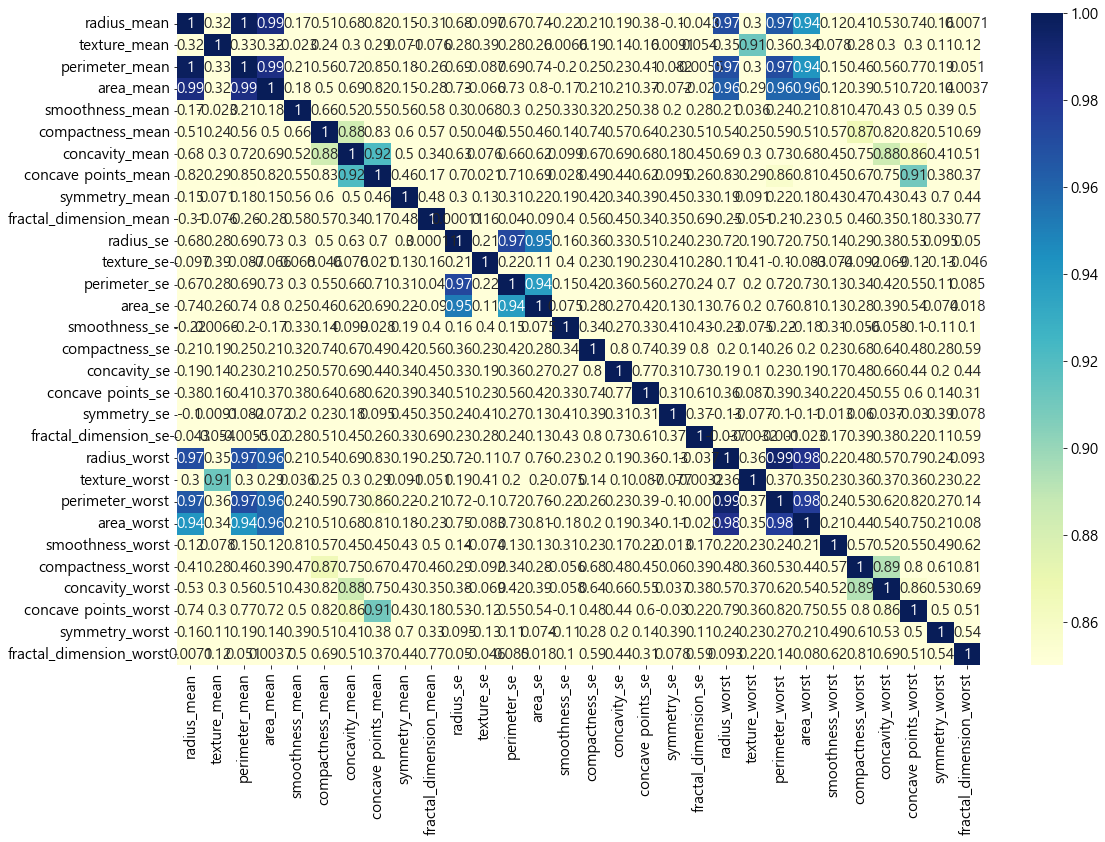

In [46]:
plt.figure(figsize=(18,12))
sns.heatmap(X.corr(), vmin=0.85,  vmax=1, cmap='YlGnBu', annot=True)

### [3] _____ 03-(a). Train-Test Split

##### (a) (2 pt) 학습과 테스트 데이터 셋을 7:3의 비율로 나누기

In [47]:
# (a) TO DO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(398, 30) (171, 30) (398,) (171,)


In [48]:
# define evaluation function
from sklearn.metrics import confusion_matrix, accuracy_score

def print_model_score(actual, pred):
    print('accuracy: %.3f' % accuracy_score(actual, pred))
    conf_matrix(y_test, y_predicted)

### [4] _____ 03-(b). Model Training.

##### (b) (5 pt) Linear kernel을 이용해 훈련 데이터로 모델을 학습시키고 테스트 데이터로 (print_model_score 함수를 이용해서) 평가하기

#### hinge loss

학습데이터 각각의 범주를 구분하면서 데이터와의 거리가 가장 먼 결정경계(decision boundary)를 찾기 위해 고안된 손실함수의 한 부류. 이로써 데이터와 경계 사이의 마진(margin)이 최대화된다. KSVMs이 바로 hinge loss를 손실함수로 쓴다.

#### For more information about hinge Loss, Click [Here](https://ratsgo.github.io/machine%20learning/2017/10/12/terms/) !

accuracy: 0.889


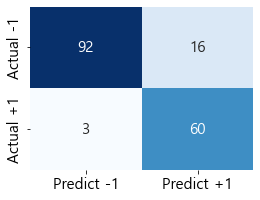

In [49]:
# (b) TO DO
from sklearn.svm import LinearSVC


# 1. 모델 선정하기
linear_model = LinearSVC(loss='hinge', random_state=0)

# 2. 모델 학습시키기 [Using Train Data] 
linear_model.fit(X_train, y_train);

# 3. 모델 적용하기 [Using Test Data]
y_predicted = linear_model.predict(X_test)

# 4. 모델 평가하기 [Using print_model_score Function]
print_model_score(y_test, y_predicted)

##### (c-1) (4 pt) 앞서 ‘describe’ 함수를 통해 데이터의 분포를 확인해보았다. 1) feature간 데이터 분포를 맞추어 주기 위해 standard-scaling을 진행하기

##### (c-2) (4 pt) Linear kernel 이용한 SVM 모델을 만들고 평가하기

In [50]:
# (c-1) TO DO
from sklearn.preprocessing import StandardScaler

Std_scale = StandardScaler()
Scaled_X  = Std_scale.fit_transform(X)

X_Scaled_train, X_Scaled_test, y_Scaled_train, y_Scaled_test = train_test_split(Scaled_X, y, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(398, 30) (171, 30) (398,) (171,)


accuracy: 0.959


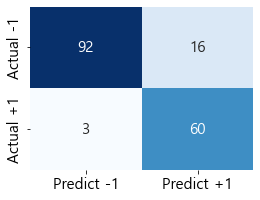

In [51]:
# (c-2) TO DO

# Scaling된 Train Data로 모델 학습시키기 [Using Train Data] 
linear_model.fit(X_Scaled_train, y_Scaled_train);

# Scaling된 Test Data를 모델에 적용하기 [Using Test Data]
y_scaled_predicted = linear_model.predict(X_Scaled_test)

# 모델 평가하기 [Using print_model_score Function]
print_model_score(y_Scaled_test, y_scaled_predicted)

StandardScaler를 적용하기 전에는 0.889의 accuracy가 나왔지만,

StandardScaler를 적용한 후에는 0.959의 accuracy가 나왔다.

즉, 매번 읽어오는 값의 크기와 범위가 조금씩 다르기 때문에

feature간 데이터 분포를 맞추어주는 Scaling 작업이 필요하다는 것을 이번 과정을 통해서 볼 수 있다.

In [52]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(fpr, tpr):

    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0,1],[0,1],'k--')   # [0~1]크기의 X축, [0~1]크기의 Y축을 만들고 선형적인 직선 Plotting !!

    plt.xlabel('FPR (1-specificity)')
    plt.ylabel('TPR (sensitivity)')
    plt.title('ROC curve')
    plt.show()
    #   TPR  =  True Positive Rate
    #   FPR  =  False Positive Rate

##### (d) (5 pt) 모델의 성능을 측정하기 위한 ROC curve를 (plot_roc_curve 함수를 이용해서) 시각화하고, AUC를 출력하기

    Scikit-learn의 많은 분류 모델들은 predict, predict_proba 함수를 제공하지만
    어떤 모델은 모델 생성시 특정 옵션을 주어야 predict_proba가 사용 가능하고(e.g SVC),
    일부 분류 모델은 predict_proba 함수를 제공하지 않는다(e.g LinearSVC).

    AUC-ROC를 계산하기 위해서는 각 클래스(label, output)에 대한 확률값(probability)이 필요하기 때문에 proba기능을 이용해야 한다.
    predict 함수는 확률값 대신에 예측된 클래스 값을 반환하기 때문에 AUC-ROC 계산에 사용할 수 없다.
    
    즉, 앞서 말했듯이,
    LinearSVC는 predict_proba를 전혀 제공하지 않기 때문에,
    SVC 또는 다른 분류 모델처럼 각 클래스에 대한 확률값(prob)을 얻으려면 확률을 얻기 위한 과정이 필요하다.

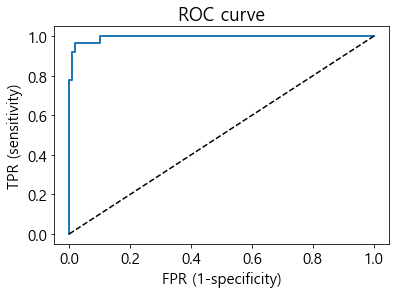

AUC score =  0.9945620223398001


In [53]:
# (d) TO DO
Y = linear_model.decision_function(X_Scaled_test)
prob = (Y - Y.min()) / (Y.max() - Y.min())

# 1. fpr, tpr, thresholds = roc_curve(테스트 데이터셋의 실제 label, 예측한 label)
fpr, tpr, threshold = roc_curve(y_Scaled_test, prob)

# 2. plot_roc_curve(fpr, tpr)
plot_roc_curve(fpr, tpr)

# # 3. print('AUC score = ', roc_auc_score(테스트 데이터셋의 실제 label, 예측한 label))
print('AUC score = ', roc_auc_score(y_test, prob))

AUC[Area Under Curve]값이 0.994로, 앞에서 구한 Model의 Accuray와 거의 유사하게 나왔다.

따라서, ROC가 올바르게 Plot되었다고 볼 수 있다고 판단된다.

***

# 04. Decision Tree & Ensemble Learning

- Dataset: fordA_train.csv, fordA_test.csv
- Target: Label (normal:1, abnormal:-1)
- Notice: Same dataset used for Logistic Regression.

### [1] _____ 04-(a). Import Libraries and Dataset

In [54]:
fordA_train  = pd.read_csv('fordA_train.csv')
fordA_test   = pd.read_csv('fordA_test.csv')

print(fordA_train.shape, fordA_test.shape)

(3601, 501) (1320, 501)


In [55]:
fordA_train.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,-0.797172,-0.664392,-0.373015,0.040815,0.526936,0.984288,1.353120,1.578108,1.659251,1.640809,...,0.722417,0.362068,0.092083,-0.081268,-0.212573,-0.391456,-0.664392,-1.073796,-1.564343,-1
1,0.804855,0.634629,0.373474,0.038343,-0.340988,-0.740860,-1.109667,-1.395357,-1.570192,-1.619951,...,0.049213,-0.258138,-0.510583,-0.683647,-0.773817,-0.785255,-0.714885,-0.560443,-0.319086,1
2,0.727985,0.111284,-0.499124,-1.068629,-1.578351,-1.990534,-2.302031,-2.503403,-2.585211,-2.550600,...,0.463685,0.507735,0.517174,0.504588,0.476270,0.438513,0.394463,0.339400,0.255391,-1
3,-0.234439,-0.502157,-0.732488,-0.946128,-1.139739,-1.323336,-1.490243,-1.607077,-1.620430,-1.506933,...,-0.929437,-0.922761,-0.929437,-0.909409,-0.835970,-0.695768,-0.478790,-0.188707,0.119736,-1
4,-0.171328,-0.062285,0.235829,0.710396,1.239969,1.649823,1.876321,1.865535,1.703751,1.466467,...,0.725496,0.697453,0.731967,0.808545,0.839823,0.733046,0.437520,-0.026585,-0.602213,-1


In [56]:
train_column = fordA_train.columns
train_column

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '491', '492', '493', '494', '495', '496', '497', '498', '499', '500'],
      dtype='object', length=501)

In [57]:
test_column = fordA_test.columns
test_column

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '491', '492', '493', '494', '495', '496', '497', '498', '499', '500'],
      dtype='object', length=501)

train Data Set의 Column갯수와 test Data Set의 Column갯수가 각각 501개라는 것과 Column이름의 인덱스가 0부터 시작하는 것을 확인하였으므로, 

X_train과 y_train을 나눌 때, 마지막 501번째 열인 '500'에 해당하는 값들이 y Data로 들어갈 수 있도록 코드를 작성해주면 된다.

In [58]:
X_train = ford_train[:][train_column[0:500]]  # ford_train에서 맨 마지막 열만 제외
y_train = ford_train[:][train_column[500]]    # ford_train에서 에서의 맨 마지막 열

X_test = ford_test[:][test_column[0:500]]     # ford_test에서 맨 마지막 열만 제외
y_test = ford_test[:][test_column[500]]       # ford_test에서 에서의 맨 마지막 열

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3601, 500) (3601,) (1320, 500) (1320,)


Data Pre-Processing에서는 Data Scaling과정을 우선적으로 진행한 뒤에 Machine Learning Model을 적용하는 것이 바람직하다.

여기서는, 이상치 영향을 최소화 할 수 있는 기법인 RobustScaler를 사용하여 Data Pre-Processing을 진행하도록 한다.

In [59]:
# Outliers can often occur in process data, which requires robust normalization.
from sklearn.preprocessing import RobustScaler

rbscale = RobustScaler()
X_train = rbscale.fit_transform(X_train)
X_test  = rbscale.transform(X_test)

### [2] _____ 04-(a). Funtions used for Model Evaluation

In [60]:
from sklearn.metrics import confusion_matrix

def conf_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    cm = pd.DataFrame(data=cm,
                      index=['Actual -1', 'Actual +1'],
                      columns=['Predict -1', 'Predict +1'])
    
    # plotting the confusion matrix
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

In [61]:
def model_evaluation(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    
    TP = cm[0,0]
    TN = cm[1,1]
    FP = cm[1,0]
    FN = cm[0,1]
    
    accuracy   =  (TP+TN)/(TP+TN+FP+FN)
    precision  =  (TP)/(TP+FP)
    recall     =  (TP)/(TP+FN)
    f1_score   =  2 * pow( (1/precision + 1/recall), -1 )
    
    print('TP         = ', TP)
    print('TN         = ', TN)
    print('FP         = ', FP)
    print('FN         = ', FN)

    print('accuracy   = ', accuracy)
    print('precision  = ', precision)
    print('recall     = ', recall)
    print('f1_score   = ', f1_score)

### [3] _____ 04-(a,b,c,d). Model Training

##### (a) (2.5 pt) Decision Tree
    Decision Tree를 이용하여 max_depth 등 hyperparameter를 조정해가며 모델을 생성하고 훈련용 데이터로 학습시키고,
    테스트 데이터로 예측한 결과를 위에서 정의한 'conf_matrix'와 'model_evaluation'함수를 통해 평가하기.

TP         =  387
TN         =  369
FP         =  270
FN         =  294
accuracy   =  0.5727272727272728
precision  =  0.589041095890411
recall     =  0.5682819383259912
f1_score   =  0.57847533632287


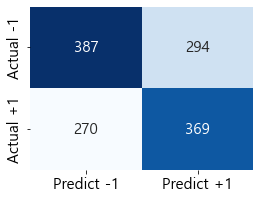

In [62]:
# (a) TO DO
from sklearn.tree import DecisionTreeClassifier


# 1. 모델 선정하기
DecisionTree_model = DecisionTreeClassifier(max_depth=10, random_state=0)

# 2. 모델 학습시키기 [Using Train Data] 
DecisionTree_model.fit(X_train, y_train);

# 3. 모델 적용하기 [Using Test Data]
y_predicted = DecisionTree_model.predict(X_test)

# 4. 모델 평가하기 [Using print_model_score Function]
model_evaluation(y_test, y_predicted)
conf_matrix(y_test, y_predicted)

##### (b) (5 pt) Bagging
    scikit learn 에서 제공하는 ‘BaggingClassifier’ module을 이용하여 bagging 통해 모델을 학습시키고 성능을 평가하기

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


TP         =  539
TN         =  355
FP         =  284
FN         =  142
accuracy   =  0.6772727272727272
precision  =  0.6549210206561361
recall     =  0.7914831130690162
f1_score   =  0.7167553191489362


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


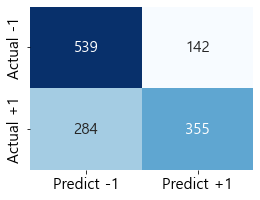

In [63]:
# (b) TO DO
from sklearn.ensemble import BaggingClassifier


# 1. 모델 선정하기
bagging = BaggingClassifier(base_estimator = DecisionTreeClassifier(),
                            n_estimators=20,   # 20개의 tree
                            random_state=0,
                            verbose=1)         # 학습 과정 표시

# 2. 모델 학습시키기 [Using Train Data] 
bagging.fit(X_train, y_train);

# 3. 모델 적용하기 [Using Test Data]
y_predicted = bagging.predict(X_test)

# 4. 모델 평가하기 [Using print_model_score Function]
model_evaluation(y_test, y_predicted)
conf_matrix(y_test, y_predicted)

##### (c) (7.5 pt) RandomForest
    RandomForest 를 통해 구현한 모델의 hyperparameter 조정(n_estimators, max_depth 등) 을 해보면서
    모델의 성능이 달라지는지 확인해보기. 다른 hyperparameter를 추가해도 좋음.

TP         =  548
TN         =  456
FP         =  183
FN         =  133
accuracy   =  0.7606060606060606
precision  =  0.7496580027359782
recall     =  0.8046989720998532
f1_score   =  0.7762039660056658


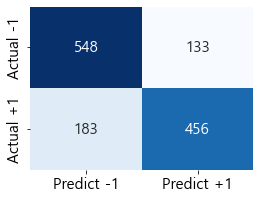

In [64]:
# (c) TO DO
from sklearn.ensemble import RandomForestClassifier


# 1. 모델 선정하기
#    n_estimators  = 모델에서 사용할 트리 갯수(학습시 생성할 트리 갯수)
#    max_depth     = 트리의 최대 깊이
RandomForest_model = RandomForestClassifier(n_estimators=200, max_depth=50, random_state=0)

# 2. 모델 학습시키기 [Using Train Data] 
RandomForest_model.fit(X_train, y_train);

# 3. 모델 적용하기 [Using Test Data]
y_predicted = RandomForest_model.predict(X_test)

# 4. 모델 평가하기 [Using print_model_score Function]
model_evaluation(y_test, y_predicted)
conf_matrix(y_test, y_predicted)

##### (d) (5 pt) Boosting
    Boosting 기법 중 하나로서, gradient Boosting 개념을 decision tree에 도입한 알고리즘이지만,
    gradient boosting 과는 달리 학습을 위한 objective function에 regularization term이 추가되어 모델이 과적합 되는 것을 방지한다.
    xgboost를 통해 구현한 xgb_model을 이용해 test data를 예측하고 성능을 평가하기.

##### stratify=y_train 의미

stratify : 지정한 Data의 비율을 유지한다.

    예를 들어, Label Set인 Y_train이 25%의 0과 75%의 1로 이루어진 Binary Set일 때,
               stratify=Y_train 로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할된다.

In [65]:
# 3601개의 Train Dataset을 Train_Data와 Validation_Data로 분할하는 작업
from sklearn.model_selection import train_test_split

X_train_train, X_val, y_train_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=0)
print(X_train_train.shape, X_val.shape, y_train_train.shape, y_val.shape)

(2880, 500) (721, 500) (2880,) (721,)


In [66]:
# !pip install xgboost
import xgboost as xgb

# 1. 모델 선정하기
xgb_model = xgb.XGBClassifier(max_depth=10,
                              learning_rate=0.1,
                              n_estimators=100,
                              objective='binary:logistic')

# 2. 모델 학습시키기 [Using Train Data] 
xgb_model.fit(X_train_train, y_train_train,
              eval_set=[(X_train_train, y_train_train), (X_val, y_val)],
              eval_metric=['auc'],
              verbose=False
              )

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

TP         =  534
TN         =  480
FP         =  159
FN         =  147
accuracy   =  0.7681818181818182
precision  =  0.7705627705627706
recall     =  0.7841409691629956
f1_score   =  0.7772925764192139


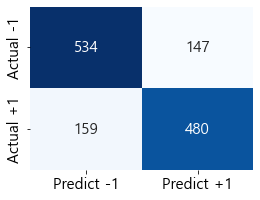

In [67]:
# (d) TO DO

# 3. 모델 적용하기 [Using Test Data]
y_predicted = xgb_model.predict(X_test)

# 4. 모델 평가하기 [Using print_model_score Function]
model_evaluation(y_test, y_predicted)
conf_matrix(y_test, y_predicted)

동일한 DataSet을 Logistic Regression으로 학습하였을 때는, 0.494의 Accuracy를 보였지만,

동일한 DataSet을 Decision Tree로 학습하였을 때는, 0.573의 Accuracy를 보였다.

동일한 DataSet을 Bagging으로 학습하였을 때는, 0.677의 Accuracy를 보였다.

동일한 DataSet을 RandomForest로 학습하였을 때는, 0.761 Accuracy를 보였다.

주어진 TrainDataSet을 TrainData와 ValidationData로 나눈 뒤, 나뉘어진 TrainData를 xgb Boosting으로 학습하였을 때는, 0.768의 Accuracy를 보였다.

Accuracy를 토대로 각 Model의 성능을 비교해보자면 다음과 같다.

#### Logistic Regression < Decision Tree < Bagging < RandomForest < Boosting

***

# 05. Clustering
- Dataset: wine_clustering.csv
- Source: UCI Machine Learning repository
- Target: 
- For more information, check this website: https://archive.ics.uci.edu/ml/datasets/wine
>These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.
- Others
https://www.kaggle.com/questions-and-answers/122539

### [1] _____ 05-(a). Import Libraries and Dataset

In [68]:
wine_data = pd.read_csv('wine_clustering.csv')
wine_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [69]:
wine_data.shape

(178, 13)

In [70]:
wine_data.values

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

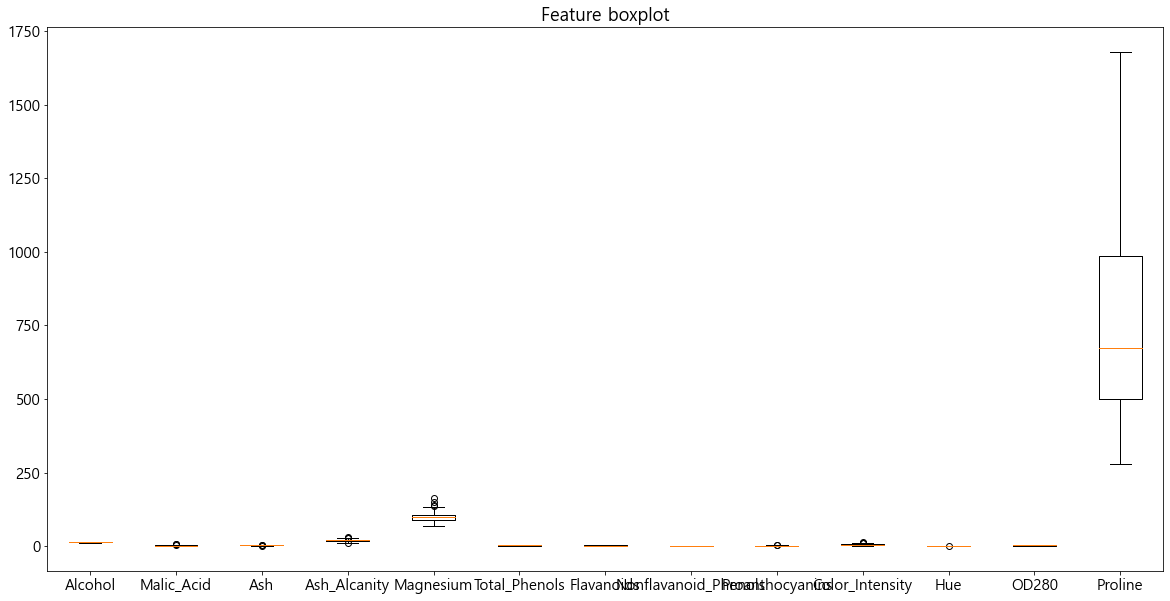

In [71]:
plt.figure(figsize=(20,10))
plt.boxplot(wine_data.values, labels=wine_data.columns)
plt.title('Feature boxplot')
plt.show()

### [2] _____ 05-(a). data normalizaiton

In [72]:
from sklearn.preprocessing import StandardScaler

Std_scale   = StandardScaler()
scaled_data = Std_scale.fit_transform(wine_data)

### [3] _____ 05-(a). visualization using PCA

##### (a) (4 pt) Clustering에 앞서, 데이터의 분포를 확인하기 위하여 PCA를 이용해 multi-dimensional data의 차원을 2차원으로 축소시키기. 

##### +) 'pca_data'를 활용해 이를 scatter plot으로 시각화 하여라.

In [73]:
from sklearn.decomposition import PCA

pca         = PCA(2)
pca_data    = pca.fit_transform(scaled_data)

pca_data_df = pd.DataFrame(pca_data)
pca_data_df

,0,1
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831
...,...,...
173,-3.370524,-2.216289
174,-2.601956,-1.757229
175,-2.677839,-2.760899
176,-2.387017,-2.297347


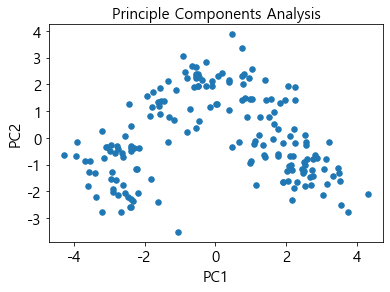

In [74]:
# (a) TO DO
plt.figure(figsize=(6,4))

plt.scatter(pca_data_df[0], pca_data_df[1], s = 30)
plt.title('Principle Components Analysis', size=15);
plt.xlabel('PC1');   plt.ylabel('PC2');
plt.yticks([i for i in range(-3,5,1)] );   plt.show();

### [4] _____ 05-(b). Clustering

##### (b) (8 pt)

    1) 적절한 k 값의 선정을 위해 Elbow Plot을 그린 것을 확인할 수 있음 (코드 실행하면 됨)
       이 그래프가 의미하는 바를 생각해보고 적절하다고 생각되는 k와 그 이유를 설명하기
      
    2) 자신이 고른 k값으로 clustering을 진행하고 다음과 같이 시각화 하기

##### Method for initialization: 'k-means++'

    selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. 
    
    즉, 초기에 군집 중심점의 좌표를 설정하는 방식으로 보통 'k-means++' 방식으로 설정한다.
    random한 방식으로 설정하는 것은 엉뚱한 결과를 초래할 수도 있기 때문이다.

##### Inertia value를 이용한 적정 군집수 판단

    K Means를 수행하기전에는 클러스터의 개수를 명시적으로 지정해줘야 한다.
    Data를 2개로 군집화할것인지, 3개로 할것인지 등을 정해야 하는데, 몇개의 클러스터의 수가 가장 적절할지는 어떻게 결정하는가?
    
    Inertia value 라는 값을 보면 적정 클러스터 수를 선택할 수 있는 힌트를 얻을 수 있는데,
    Inertia value는 군집화 된 후에, 각 중심점에서 군집의 데이타간의 거리를 합산한 것이므로 군집의 응집도를 나타내는 값이다.
    이 값이 작을 수록 응집도가 높게 군집화가 잘되었다고 평가할 수 있다.

    이 inertia value는 KMeans 모델이 학습된 후에, model.inertia_ 값으로 뽑아 볼 수 있다.

#### For more information about Inertia value, Click [Here](https://bcho.tistory.com/1203) !

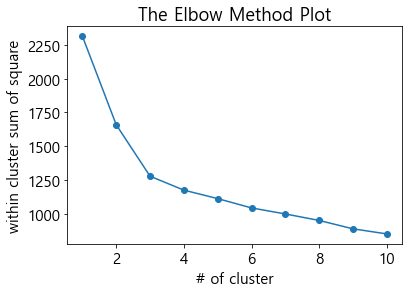

In [75]:
# (b-1) TO DO
from sklearn.cluster import KMeans

within_cluster_ss = []

for i in range(1, 10+1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)  # 1. 모델 선정하기
    kmeans.fit(scaled_data)                                          # 2. 모델 학습시키기 [Using Train Data] 
    ss = kmeans.inertia_                                             # Inertia Value 값 가져오기 - Elbow Plot의 Y축 값을 결정함
    within_cluster_ss.append(ss)
    
cluster_num = range(1, 10+1)
plt.plot(cluster_num, within_cluster_ss, marker='o')
plt.title('The Elbow Method Plot')
plt.xlabel('# of cluster');   plt.ylabel('within cluster sum of square');   plt.show();

Elbow Method Plot의 각 축에 대한 설명을 하자면 다음과 같다.

    x축 : k 값
    y축 : k 값에 따라 결정되는 kmeans Model의 Inertia Value
   
Inertia value는 군집화 된 후에, 각 중심점에서 군집의 데이타간의 거리를 합산한 것이므로 군집의 응집도를 나타내는 값이다.
따라서, 이 값이 작을 수록 응집도가 높게 군집화가 잘되었다고 평가할 수 있다.

Elbow Plot을 살펴보면, K의 값이 1~3인 경우에서는 K값이 증가하면 증가할수록 Inertia 값이 급격하게 하강하는 것을 확인할 수 있다.

하지만, k값이 3을 넘어가는 순간부터는 Inertia값의 변화의 폭이 크지 않은 것을 볼 수 있다.

따라서, 이번 데이터에서는 k=3을 선택하는 것이 가장 적합하다고 판단된다.


In [76]:
# (b-2) TO DO
# K means clustering, define k as '3'
k = 3

kmeans      = KMeans(n_clusters=k)
y_predicted = kmeans.fit_predict(scaled_data)

clustering_criteria = pd.Series(y_predicted).value_counts().sort_values()
clustering_criteria

0    51
1    62
2    65
dtype: int64

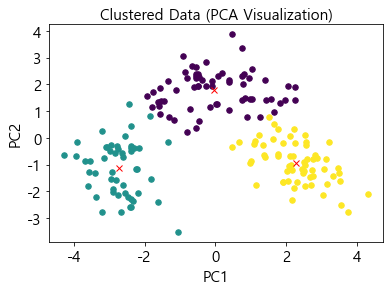

In [77]:
# Hint
# 1. 바로 위의 코드를 참고하여 구현
# 2. centroid를 얻기 위해 centroid = kmeans.cluster_centers_ 실행
# 3. centroid의 principal component 를 얻기 위해 centroid_pca = pca.transform(centroid) 실행
# 4. 'pca_data'와 'centroid_pca'를 활용해 scatter plot 을 visualizaiton

# [253/255, 231/255, 37/255]   =   Yellow
# [33/255, 145/255, 140/255]   =   Green
# [68/255, 1/255, 84/255]      =   Purple

centroid      =  kmeans.cluster_centers_
centroid_pca  =  pca.transform(centroid) 

plt.figure(figsize=(6,4))
colors = [[33/255, 145/255, 140/255],[253/255, 231/255, 37/255],[68/255, 1/255, 84/255],'r','b','k']

for i in range(0,k):
    temp = pca_data_df[y_predicted == i]
    
    #Plotting the results
    plt.scatter(temp[0] , temp[1] , s = 30, color=colors[i])
    plt.plot(centroid_pca[i][0], centroid_pca[i][1], 'xr')

plt.title('Clustered Data (PCA Visualization)', size=15);
plt.xlabel('PC1');   plt.ylabel('PC2');
plt.yticks([i for i in range(-3,5,1)] );
plt.show();

***

***

### Extra - Classifying random data

##### (c) (8 pt)

    임의로 난수를 생성하여 대략 5개의 군집을 형성한 그래프를 시각화 하였다.
    k값을 5로 설정하고 k-means clustering을 진행하였는데 이유가 무엇인지 군집이 잘 형성되지 않았다.
    왜 이러한 결과가 나오는지 생각해보고, 이를 해결할 수 있는 방법이 있다면 근거를 간단히 설명하고 다시 군집화 해보자.


#### random_state란?

    scikit learn에서 사용하는 random_state 인자는 수행시마다 동일한 결과를 얻기 위해 적용합니다.
    
    train_test_split(..., test_size=0.2) 과 같은 함수는 80% train, 20% test 데이터 세트를 추출합니다.
    하지만 추출된 데이터는 수행을 할때마다 다를수 있습니다. random하게 80%, 20%를 추출하기 때문입니다.

    random_state=1 이라고 하면 바로 이 random 함수의 seed 값을 고정시키기 때문에
    여러번 수행하더라도 같은 레코드를 추출합니다. random 함수의 seed값을 random_state라고 생각하시면 됩니다.
    
    random_state를 어떤 값으로 하셔도 상관없습니다. 이는 random값을 고정하는 역할만 수행합니다.

#### For more information about random_state, Click [Here](https://www.inflearn.com/questions/110501) !

#### make_blobs 란?

make_blobs 함수는 등방성 가우시안 정규분포를 이용해 가상 데이터를 생성한다. 

이 때 등방성이라는 말은 모든 방향으로 같은 성질을 가진다는 뜻이다.


    인수:     n_samples    :  표본 데이터의 수, 디폴트 100
              n_features   :  독립 변수의 수, 디폴트 20
              centers      :  생성할 클러스터의 수 혹은 중심, [n_centers, n_features] 크기의 배열. 디폴트 3
              cluster_std  :  클러스터의 표준 편차, 디폴트 1.0
              center_box   : 생성할 클러스터의 바운딩 박스(bounding box), 디폴트 (-10.0, 10.0))

    반환값:   X  : [n_samples, n_features] 크기의 배열 [독립 변수]
              y  : [n_samples] 크기의 배열 [종속 변수]

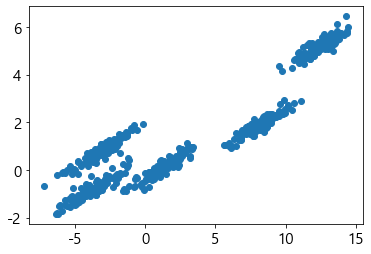

In [78]:
from sklearn.datasets import make_blobs

# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=500, n_features=2, centers=5)
random_generator = np.random.RandomState(70)

# transform the data to be stretched
transform = random_generator.normal(size=(2,2))
X = np.dot(X, transform)

# plot
plt.scatter(X[:,0], X[:,1])
plt.show()

Text(0.5, 1.0, 'Clustered Data using k-means clustering')

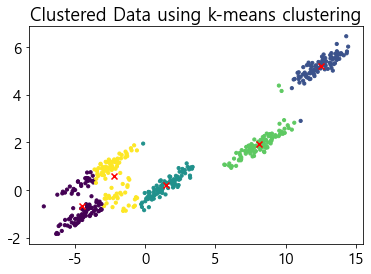

In [79]:
kmeans = KMeans(n_clusters=5)     # 1. 모델 선정하기
y_pred = kmeans.fit_predict(X)    # 2. 모델 적용 

# plot the cluster assignments and cluster centers
plt.scatter(X[:,0], X[:,1], c=y_pred, s=10)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='x', c='red')
plt.title('Clustered Data using k-means clustering')

위에서 군집이 정상적으로 되지 않은 이유는 애초에 모델 자체를 적절하지 않은 모델로 선정하였기 때문이다.

#### 1. K-means
    
    K-means 알고리즘은 쉽고 간결하며 대용량 데이터에도 활용이 가능하다.
    하지만 거리 기반 알고리즘으로 feature의 개수가 너무 많아진다면 군집화의 성능이 저하된다.
    
    따라서 경우에 따라 PCA로 차원을 축소하여 적용하기도 한다.
    또한 반복적인(iterative) 알고리즘이기 때문에 반복 횟수가 급격히 많아질 경우 학습 수행 시간이 느려지며
    이상치(outlier)에 상당히 민감한 모델이다.


#### 2. GMM(Gaussian Mixture Model)
    
    GMM은 Parametric 모델로서 EM(Expectation Maximization) 알고리즘을 이용한 대표적인 군집화 모델이다.
    개별 데이터가 가우시안 분포에 속한다고 가정을 한 상태에서 특정 정규분포에 속할 확률을 추정하는 것이다.
    Scikit-learn에서 제공하는 API의 주요 파라미터는 n_components로 사전적으로 정의하는 군집화 개수를 의미한다. 
    
    GMM은 특히 잘 적용이 되는 데이터 분포가 있는데 주로 타원형으로 길게 늘어진 데이터 분포에 적용이 용이하다.
    GMM은 수행 시간이 오래 걸린다는 단점이 존재하지만 K-Means 대비 보다 유연하게 다양한 데이터에 적용될 수 있다는 이점을 갖는다.


#### For more information about Kmeans and GMM, Click [Here]( https://daebaq27.tistory.com/49) !

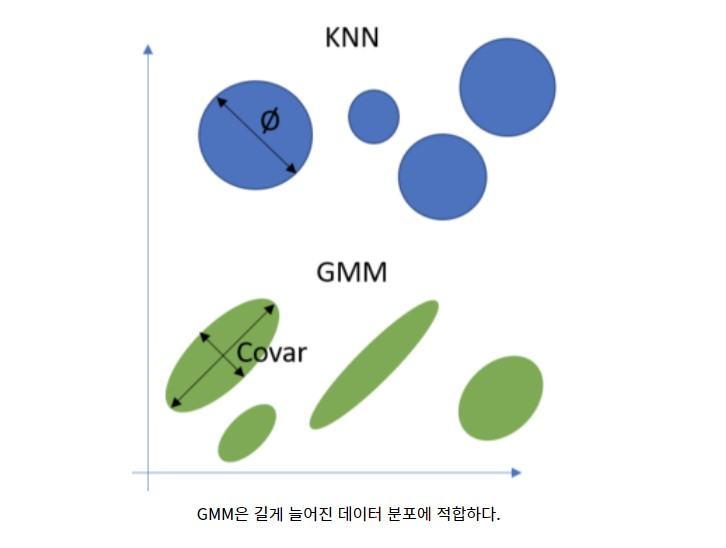

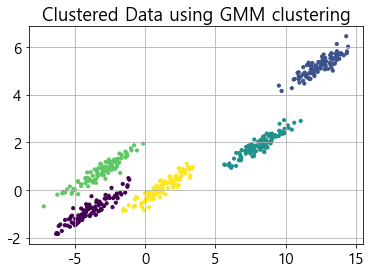

In [80]:
# (c) TO DO
from sklearn.mixture import GaussianMixture

# n_components로 미리 군집 개수 설정
gmm         =  GaussianMixture(random_state=1, n_components=5)
gmm_labels  =  gmm.fit_predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:,0], X[:,1], c=gmm_labels, s=10)
plt.title('Clustered Data using GMM clustering')
plt.grid();   plt.show()

Gaussian 형태로 길게 늘어진 DataSet 각각에 대한 Clustering이므로, 이에 대해서는 GMM Clustering 기법을 이용해줘야 정상적으로 학습할 수 있다.